## Medical Appointment No Shows

### 1. Load Libraries

Below we will load all the required libraries. Libraries for reading CSV File, Basic EDA, Visualization and Data Modeling are all loaded in the below cell.

In [2]:
import pandas as pd
import numpy as np
import datetime
from time import strftime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

### 2. Load Data

In the below cell we will load the data from the CSV file in to a DataFrame. We will also check the row and column count by getting the shape of the data.

In [5]:
df = pd.read_csv(r'C:\Users\alkhafeg\Desktop\T5_Project_v2\KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape

(110527, 14)

### 3. Basic Info of the Data

In the below cells we will see the basic information about the data that we had loaded in the previous step.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 No NaN values in any of the above columns.

In [8]:
# Print the top 5 rows
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 4. Correct colmuns:

In [10]:
# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

In [12]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 5. Data Explorations and EDA

In [13]:
df.columns.ravel()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow'],
      dtype='object')

From the above Info of the DataFrame and the sample data we can see that there are 14 columns in total.

 - There are 13 Independent Variables -> ['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay' 'Age' 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism' 'Handicap' 'SMSReceived']
 - The Dependent Variable is -> ['NoShow']

In [14]:
# Drop 'PatientId' and 'AppointmentID' as they are just some system genrated numbers.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [15]:
# Print Unique Values
print("Unique Values in `Gender` => {}".format(df.Gender.unique()))
print("Unique Values in `Scholarship` => {}".format(df.Scholarship.unique()))
print("Unique Values in `Hypertension` => {}".format(df.Hypertension.unique()))
print("Unique Values in `Diabetes` => {}".format(df.Diabetes.unique()))
print("Unique Values in `Alcoholism` => {}".format(df.Alcoholism.unique()))
print("Unique Values in `Handicap` => {}".format(df.Handicap.unique()))
print("Unique Values in `SMSReceived` => {}".format(df.SMSReceived.unique()))

Unique Values in `Gender` => ['F' 'M']
Unique Values in `Scholarship` => [0 1]
Unique Values in `Hypertension` => [1 0]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Handicap` => [0 1 2 3 4]
Unique Values in `SMSReceived` => [0 1]


From the above detail we can see that except for `Handicap` which has four values and `Gender` which has 'M' and 'F' all the other features have 'Yes' or 'No' kind of values. So, we will convert those columns to `'object'` type.

In [16]:
#just test befor its object
df['Scholarship'] = df['Scholarship'].astype('int64')
df['Hypertension'] = df['Hypertension'].astype('int64')
df['Diabetes'] = df['Diabetes'].astype('int64')
df['Alcoholism'] = df['Alcoholism'].astype('int64')
df['Handicap'] = df['Handicap'].astype('int64')
df['SMSReceived'] = df['SMSReceived'].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hypertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handicap        110527 non-null  int64         
 10  SMSReceived     110527 non-null  int64         
 11  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [18]:
# Print some sample data
df.sample(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
78644,M,2016-04-20,2016-05-05,7,BONFIM,0,0,0,0,3,1,No
8155,F,2016-05-18,2016-05-20,54,REPÚBLICA,0,0,0,0,0,0,No
106677,F,2016-05-09,2016-06-08,0,SANTA TEREZA,0,0,0,0,0,1,No


In [20]:
# Print Unique Values for 'Age'
print(format(np.sort(df.Age.unique())))

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


In the below code we will check few details about the patients with `Age` `0` and `-1`.

In [21]:
print("Patients with `Age` less than -1 --- {}".format(df[df.Age == -1].shape[0]))
print("Patients with `Age` equal to 0 --- {}".format(df[df.Age == 0].shape[0]))

Patients with `Age` less than -1 --- 1
Patients with `Age` equal to 0 --- 3539


As there is only 1 patient with `Age` less than 0 we will delete that record assuming that they was a typo.

In [22]:
df = df[df.Age >= 0]

As we have 3539 patients with `Age` equal to 0 we are assuming that these are the small babies with few months of Age. Usually as babies doesn't have `Hypertension` or `Diabetes` or `Alcoholism` we will check these features for the above records to see if our assumption is correct.

In [23]:
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


As we have no records above, we will confirm our conclusion that `Age` value of 0 indeed represents babies who are just few months old.

In [24]:
# Print Unique Values for 'ScheduledDay'
print("Unique Values in `ScheduledDay` => {}".format(np.sort(df.ScheduledDay.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `ScheduledDay` => ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-04-14' '2016-04-15' '

We can see from the above details that the `ScheduledDay` for appointments are ranging from **2015-11-10** to **2016-06-08** and that's around 7 months of data.

In [25]:
#Print Unique Values for 'AppointmentDay'
print("Unique Values in `AppointmentDay` => {}".format(np.sort(df.AppointmentDay.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `AppointmentDay` => ['2016-04-29' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-09' '2016-05-10' '2016-05-11' '2016-05-12'
 '2016-05-13' '2016-05-14' '2016-05-16' '2016-05-17' '2016-05-18'
 '2016-05-19' '2016-05-20' '2016-05-24' '2016-05-25' '2016-05-30'
 '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03' '2016-06-06'
 '2016-06-07' '2016-06-08']


From the above detail we can see that `AppointmentDay` ranges from **2016-04-29** to **2016-06-08**. The `AppointmentDay` spans just above 1 Month in contrast to the `ScheduledDay` that spans around 7 Months.

In [23]:
# Print Unique Values for 'Neighbourhood'
#print("Unique Values in `Neighbourhood` => {}".format(np.sort(df.Neighbourhood.unique())))

In [26]:
# Print Unique Values for 'Neighbourhood'

# Original list of neighborhoods
old_neighborhoods =['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO JOÃO',
       'FONTE GRANDE', 'ENSEADA DO SUÁ', 'SANTOS REIS', 'PIEDADE',
       'JESUS DE NAZARETH', 'SANTA TEREZA', 'CRUZAMENTO',
       'ILHA DO PRÍNCIPE', 'ROMÃO', 'COMDUSA', 'SANTA CECÍLIA',
       'VILA RUBIM', 'DE LOURDES', 'DO QUADRO', 'DO CABRAL', 'HORTO',
       'SEGURANÇA DO LAR', 'ILHA DO BOI', 'FRADINHOS', 'NAZARETH',
       'AEROPORTO', 'ILHAS OCEÂNICAS DE TRINDADE', 'PARQUE INDUSTRIAL']
# New list of neighborhoods
new_neighborhoods = [
    "Al Nakheel", "Al Rawdah", "Al Hamra", "Al Falah", "Al Yarmouk", "Al Rayyan", "Al Izdihar",
    "Al Mugharzat", "Al Olaya", "Al Sulimaniyah", "Al Malaz", "Al Murabba", "Al Shemaysi",
    "Al Manar", "Al Maather", "Al Zahra", "Al Safarat", "Al Hada", "Al Ghadir", "Al Nafal",
    "Al Wadi", "Al Muhammadiyah", "Al Masif", "Al Mursalat", "Al Malqa", "Al Qirawan",
    "Al Aqiq", "Al Narjis", "Al Rabea", "Al Qadisiyah", "Al Khuzama", "Al Sahafa", "Al Nuzhah",
    "Al Rawabi", "Al Wahah", "Al Mughrizat", "Al Dar Al Baida", "Al Rabie", "Al Rimal",
    "Al Salam", "Al Shifa", "Al Uraija", "Al Faisaliyah", "Al Jazirah", "Al Khozama", "Al Badiah",
    "Al Diriyah", "Al Taawun", "Al Hazm", "Al Murooj", "Al Masyaf", "Al Dana", "Al Dhubbat",
    "Al Manakh", "Al Muruj", "Al Oud", "Al Qayrawan", "Al Rahmaniya", "Al Selayy",
    "Al Shohada", "Al Waha", "An Narjis", "As Sahafah", "As Salam", "As Sulaymaniyah",
    "Ash Shuhada", "Al Andalus", "Al Arid", "Al Mugharzat", "Al Mughrizat", "Al Quds",
    "Al Raed", "Al Rahmaniyah", "Al Rayah", "Al Rehmania", "Al Sheraa", "Al Yasmin",
    "Al Yasmine", "An Nada", "An Nasim", "An Nuzhah", "Ar Rabi", "Ar Rawdah", "Ar Rimal"
]


# Replace old neighborhoods with new ones
for i in range(len(old_neighborhoods)):
    df['Neighbourhood'] = df['Neighbourhood'].replace(old_neighborhoods[i], new_neighborhoods[i])

# Now df contains the updated neighborhoods
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,Al Nakheel,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,Al Nakheel,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,Al Rawdah,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,Al Hamra,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,Al Nakheel,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,Al Masif,0,0,0,0,0,1,No
110523,F,2016-05-03,2016-06-07,51,Al Masif,0,0,0,0,0,1,No
110524,F,2016-04-27,2016-06-07,21,Al Masif,0,0,0,0,0,1,No
110525,F,2016-04-27,2016-06-07,38,Al Masif,0,0,0,0,0,1,No


In [27]:
df["Neighbourhood"].isnull().sum()


0

In [28]:
df.sample(30)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
65747,M,2016-03-01,2016-05-02,8,Al Muhammadiyah,0,0,0,0,0,1,No
8554,M,2016-05-05,2016-05-12,46,Al Taawun,0,1,0,0,0,1,No
61838,M,2016-05-17,2016-05-18,56,Al Nuzhah,0,0,0,0,0,0,No
84630,F,2016-05-05,2016-06-01,44,Al Masif,1,0,0,0,0,1,Yes
72880,F,2016-05-04,2016-05-04,30,Al Rayyan,0,0,0,0,0,0,No
71753,F,2016-05-20,2016-05-20,41,Al Oud,0,0,0,0,0,0,Yes
13446,M,2016-05-12,2016-05-19,54,Al Sulimaniyah,0,1,0,1,0,0,No
67436,F,2016-05-16,2016-05-19,60,Al Muhammadiyah,0,0,0,0,0,0,No
17868,F,2016-04-28,2016-05-19,15,Al Hazm,0,0,0,0,0,0,No
78492,F,2016-05-11,2016-05-11,59,Al Wadi,0,0,0,0,0,0,No


In [29]:
# Print Total Count for 'Neighbourhood'
print("Total Count for `Neighbourhood` => {}".format(df.Neighbourhood.unique().size))

Total Count for `Neighbourhood` => 79


Get Day of the Week for `ScheduledDay` and `AppointmentDay` to see if there are many 'NoShows' over the weekends.
Week for `ScheduledDay` and `AppointmentDay` also helps us to see if there is a particular pattern where most patients are coming for a visit.

In [30]:
df.sample(10)


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
47590,M,2016-04-20,2016-05-09,68,Al Maather,0,1,0,0,0,0,No
100670,F,2016-04-25,2016-06-02,3,Al Sulimaniyah,0,0,0,0,0,0,No
31214,F,2016-04-29,2016-05-10,11,Al Faisaliyah,1,0,0,0,0,1,Yes
12190,M,2016-05-17,2016-05-19,49,As Sahafah,0,0,0,0,0,0,No
97429,M,2016-05-16,2016-06-08,14,Al Shifa,0,0,0,0,0,0,No
96835,F,2016-06-02,2016-06-02,59,Al Jazirah,0,1,1,0,0,0,No
7454,M,2016-05-18,2016-05-18,52,Al Shifa,0,0,0,1,0,0,No
80897,M,2016-04-20,2016-05-31,6,Al Wadi,0,0,0,0,0,0,No
44767,M,2016-05-19,2016-05-19,57,Al Mughrizat,0,0,0,0,0,0,No
108690,M,2016-06-07,2016-06-07,40,Al Falah,0,0,0,0,0,0,No


In [31]:
## We add two new columns for get the days
## Get Day of the Week for ScheduledDay and AppointmentDay
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.day_name()
##########################################################################

In [32]:
df.sample(4)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW
44584,F,2016-04-28,2016-05-02,17,Al Taawun,0,0,0,0,0,0,Yes,Thursday,Monday
18603,F,2016-05-11,2016-05-11,3,Al Mursalat,0,0,0,0,0,0,No,Wednesday,Wednesday
107385,M,2016-06-01,2016-06-01,0,Al Mugharzat,0,0,0,0,0,0,No,Wednesday,Wednesday
27565,M,2015-12-08,2016-05-11,83,Al Mugharzat,0,1,0,0,1,1,Yes,Tuesday,Wednesday


Ideally the `AppointmentDay` should be on or after the `ScheduledDay`. Below we will check if there are any records where there is an inconsistency. In case if the `ScheduledDay` is after the `AppointmentDay` we will consider it as an error and correct the `ScheduledDay` to the `AppointmentDay`.

In [33]:
df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])

# Get the Waiting Time in Days of the Patients.
df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days

In [34]:
df.sample()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days
90978,F,2016-05-31,2016-06-08,70,Al Sulimaniyah,0,1,0,0,0,1,No,Tuesday,Wednesday,8


In [35]:
# Sanity check to see if the Waiting Time is less than Zero for any of the data points.
print("There are [{}] records where the Waiting Time is less than Zero.".format(df[df.Waiting_Time_days < 0].shape[0]))

There are [0] records where the Waiting Time is less than Zero.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Gender              110526 non-null  object        
 1   ScheduledDay        110526 non-null  datetime64[ns]
 2   AppointmentDay      110526 non-null  datetime64[ns]
 3   Age                 110526 non-null  int64         
 4   Neighbourhood       110526 non-null  object        
 5   Scholarship         110526 non-null  int64         
 6   Hypertension        110526 non-null  int64         
 7   Diabetes            110526 non-null  int64         
 8   Alcoholism          110526 non-null  int64         
 9   Handicap            110526 non-null  int64         
 10  SMSReceived         110526 non-null  int64         
 11  NoShow              110526 non-null  object        
 12  ScheduledDay_DOW    110526 non-null  object        
 13  AppointmentDay_DOW  110526 non-nul

In [37]:
df.sample(n=10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days
105178,F,2016-06-06,2016-06-08,66,Al Quds,0,1,0,0,0,0,No,Monday,Wednesday,2
10975,F,2016-05-12,2016-05-16,56,Al Mugharzat,0,1,1,0,0,0,Yes,Thursday,Monday,4
31361,M,2016-04-29,2016-05-06,67,Al Uraija,0,0,0,0,0,0,Yes,Friday,Friday,7
32981,M,2016-05-02,2016-05-02,4,Al Masif,0,0,0,0,0,0,No,Monday,Monday,0
79179,F,2016-04-20,2016-05-25,62,Al Sulimaniyah,0,0,1,0,0,1,No,Wednesday,Wednesday,35
22684,M,2016-05-10,2016-05-10,46,Al Safarat,0,0,0,1,0,0,No,Tuesday,Tuesday,0
10839,M,2016-05-13,2016-05-18,20,Al Shemaysi,0,0,0,0,0,0,Yes,Friday,Wednesday,5
103552,M,2016-05-17,2016-06-08,1,As Sahafah,0,0,0,0,0,1,No,Tuesday,Wednesday,22
72027,F,2016-05-12,2016-05-12,2,Al Rayyan,0,0,0,0,0,0,No,Thursday,Thursday,0
49973,M,2016-05-11,2016-05-12,52,Al Nakheel,0,1,0,0,0,0,No,Wednesday,Thursday,1


In [38]:
## We are Showed the Percent of Patients who is present and not
print("NoShow and Show Count of Patients\n")
print(df.groupby(['NoShow']).size())

print("\nNoShow and Show '%' of Patients\n")
show = df.groupby(['NoShow']).size()[0]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who `Did `Showed Up` => {:.2f}%".format(show*100))
noshow = df.groupby(['NoShow']).size()[1]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who Not Showed Up` => {:.2f}%".format(noshow*100))

NoShow and Show Count of Patients

NoShow
No     88207
Yes    22319
dtype: int64

NoShow and Show '%' of Patients

Percent of Patients who `Did `Showed Up` => 79.81%
Percent of Patients who Not Showed Up` => 20.19%


Based on the provided information, it's evident that there exists a significant class imbalance. Approximately 80% of patients attend their appointments as scheduled, while the remaining 20% are not showing up for their appointments.

### 5. Data Visualization

#### 5.0 Show/NoShow

Below we can see that out of 110,500 patients around 88,000 of them have turned up and that's around 80%.

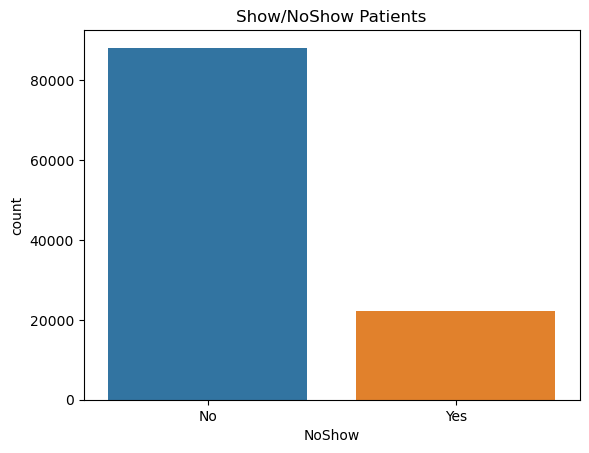

In [39]:
ax = sns.countplot(x="NoShow", data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

#### 5.1 Gender

The data reveals that among the 88,000 patients who attended their appointments, approximately 57,000 are females and 31,000 are males. Conversely, out of the 22,500 patients who didn't attend, roughly 15,000 are females and 7,500 are males. Interestingly, the ratio of females to males who attended mirrors that of those who missed their appointments.

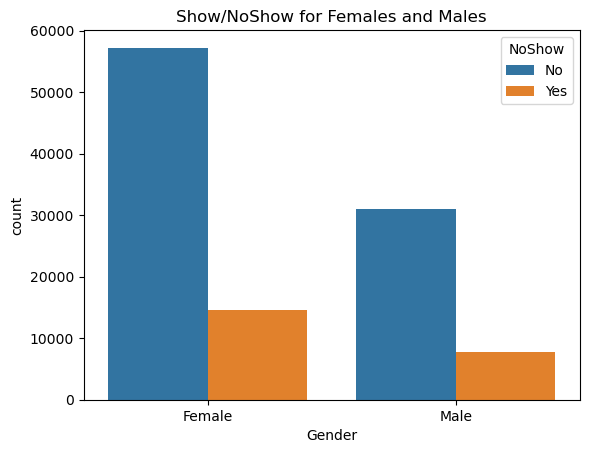

In [40]:
ax = sns.countplot(x="Gender", hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can clearly see that 'Female' patients usually have more appointments that 'Male' patients. So, **Gender** might be an important factor. But if we closely look at the NoShow distribution across Male's and Female's it is almost the same. So, **Gender** may not play an important role in determining if a patient comes for a visit or not.

#### 5.2 Age

We will draw a boxplot for the `Age` feature to check it's distribution.

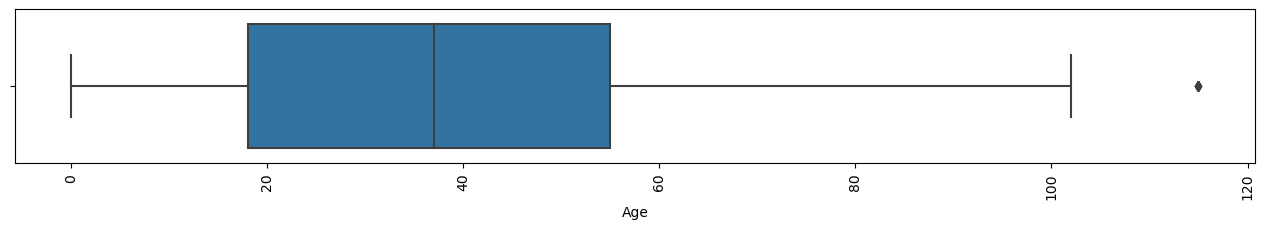

In [41]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=df.Age)

From the above `BoxPlot` we can see that the Median Age is around 30 and the IQR is between 18 and 55.
Though the BoxPlot shows few datapoints as outliers we will not consider them as true outliers for this case.

Below we will plot the number of patients for different Age.

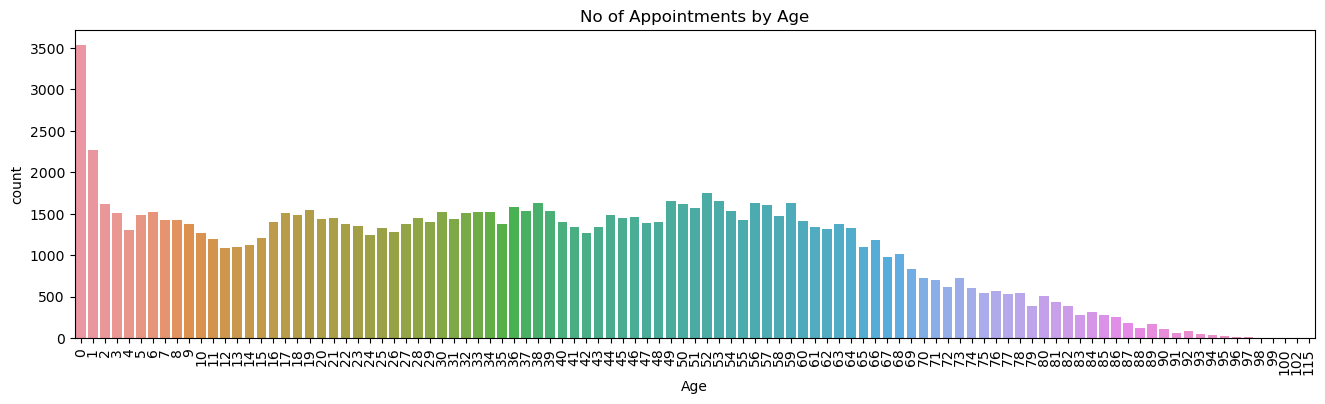

In [42]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("No of Appointments by Age")
plt.show()

From the above Histogram we can see that there are peaks for the Infants and then the distribution starts to be uniform. Later, after the Age of around 60 we see a right-skewed distribution.

Below we will plot the Show/NoShow for the patients based on their Age.

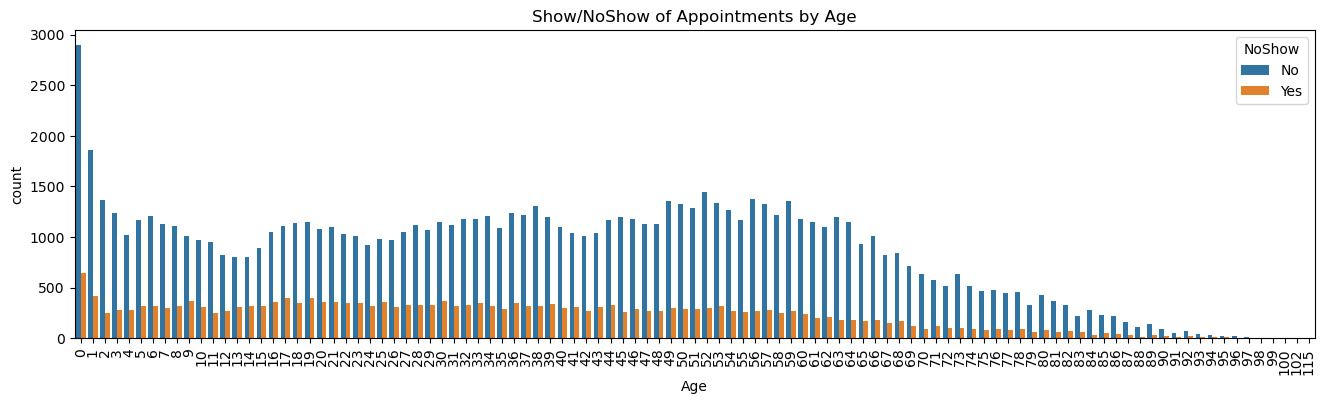

In [43]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age, hue=df.NoShow)
ax.set_title("Show/NoShow of Appointments by Age")
plt.show()

From the above visualization looks like the ratio of Show to NoShow is almost the same for all Age's except for 'Age 0' and 'Age 1'. We will get a better clarity on the ratio of Show to NoShow for all Age's.

In [44]:
df_age_ratio = df[df.NoShow == 'No'].groupby(['Age']).size()/df.groupby(['Age']).size()

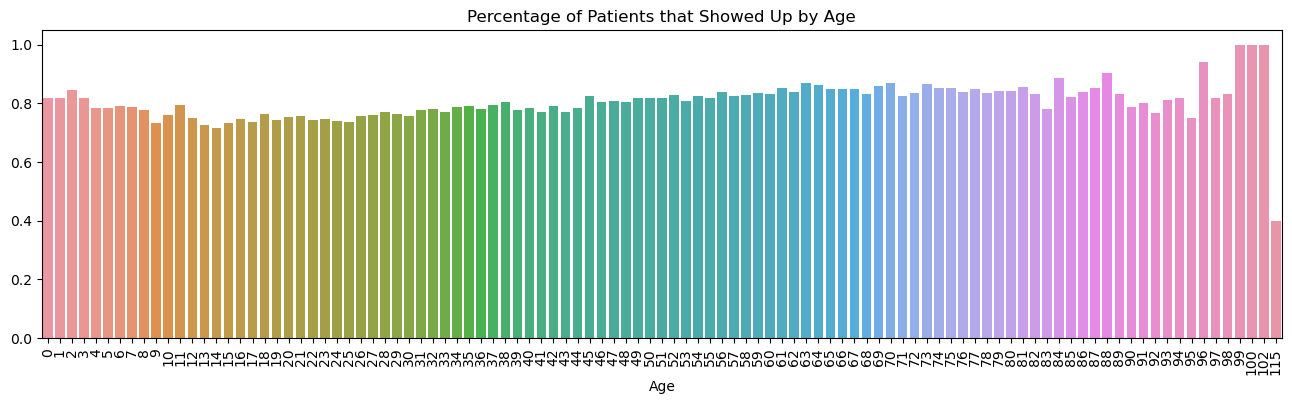

In [45]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
ax.set_title("Percentage of Patients that Showed Up by Age")
plt.show()

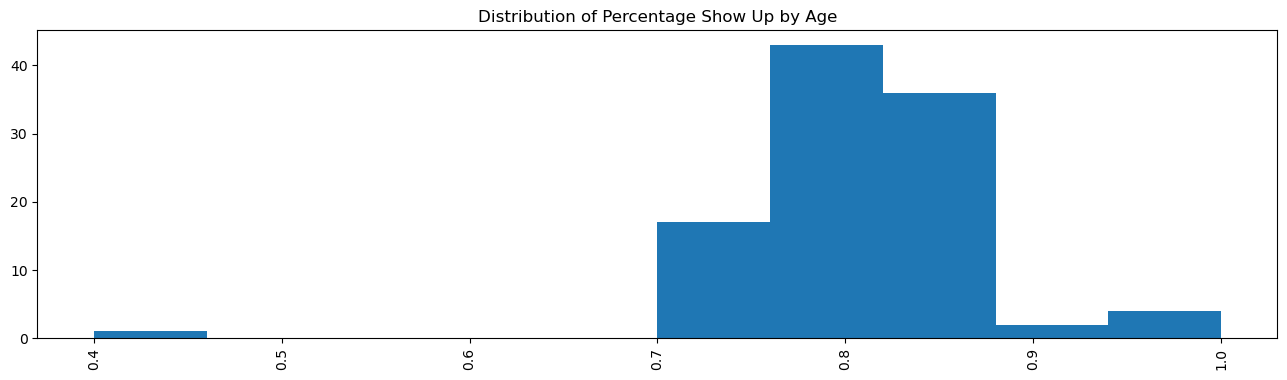

In [46]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = plt.hist(df_age_ratio)
plt.title("Distribution of Percentage Show Up by Age")
plt.show()

From the above visualization we could clearly see that most of the Age group patients have around 80% Show rate.

#### 5.3 Neighbourhood

Below we will see the patients count for each Neighbourhood.

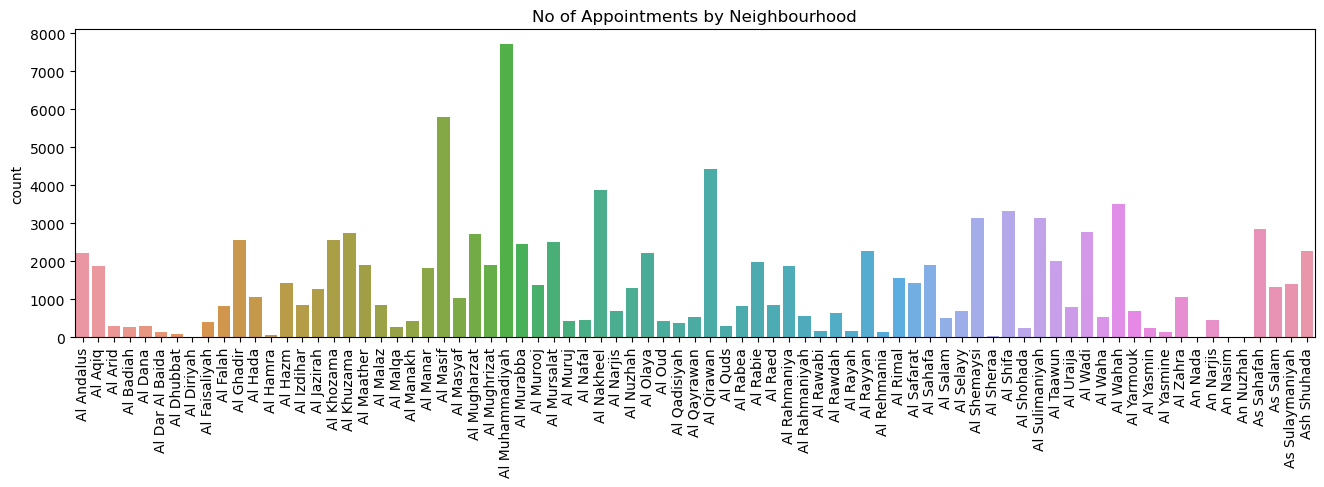

In [47]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

From the above visualization we can see that the number of patients for few Neighbourhood's is very high.

In [48]:
plt.figure(figsize=(8,35))
#plt.xticks(rotation=90)
# ax = sns.countplot(x=np.sort(df.Neighbourhood), hue=df.NoShow, order=df.Neighbourhood.value_counts().index)
# ax.set_title("Show/NoShow by Neighbourhood")



<Figure size 800x3500 with 0 Axes>

<Figure size 800x3500 with 0 Axes>

From the above visualization looks like the ratio of Show to NoShow is almost the same for all Neighbourhood's. We will get a better clarity on the ratio of Show to NoShow for all Neighbourhood's in the below visualization.

In [49]:
df_n_ratio = df[df.NoShow == 'No'].groupby(['Neighbourhood']).size()/df.groupby(['Neighbourhood']).size()

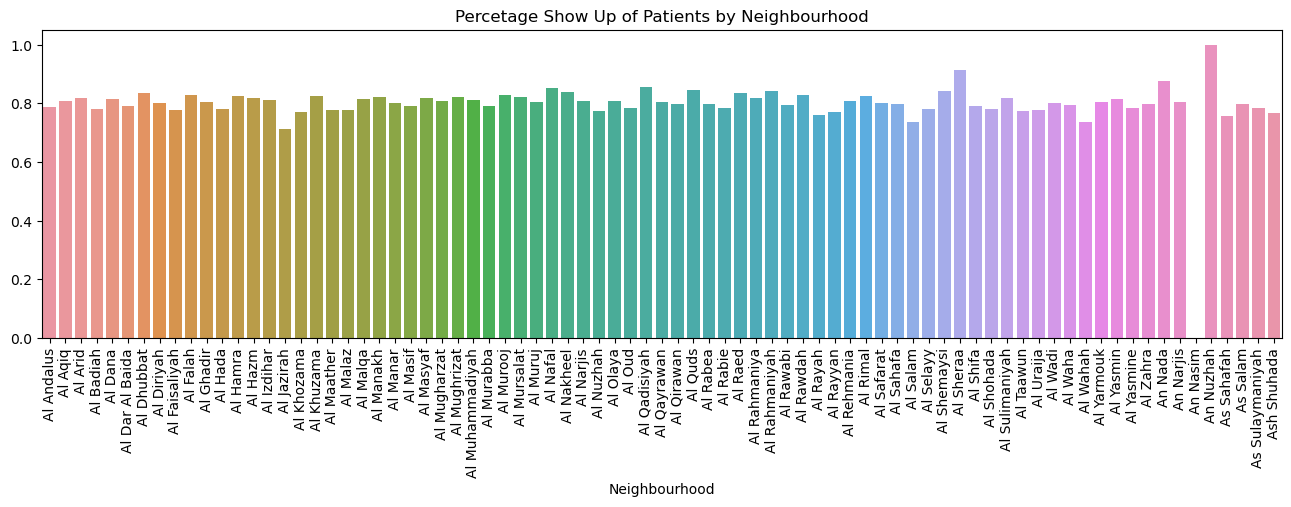

In [50]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_n_ratio.index, y=df_n_ratio)
ax.set_title("Percetage Show Up of Patients by Neighbourhood")
plt.show()

As most of the Neighbourhood have around 80% Show rate, this feature may not add much value while building a model to help us determine which segment of patients are tuning up for a visit the most.

#### 5.4 Scholarship

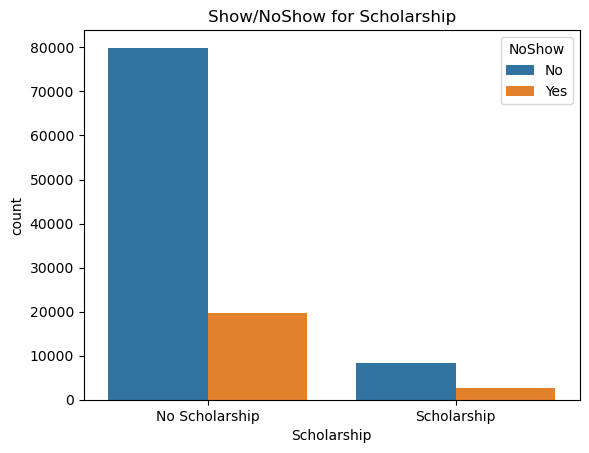

In [51]:
ax = sns.countplot(x=df.Scholarship, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

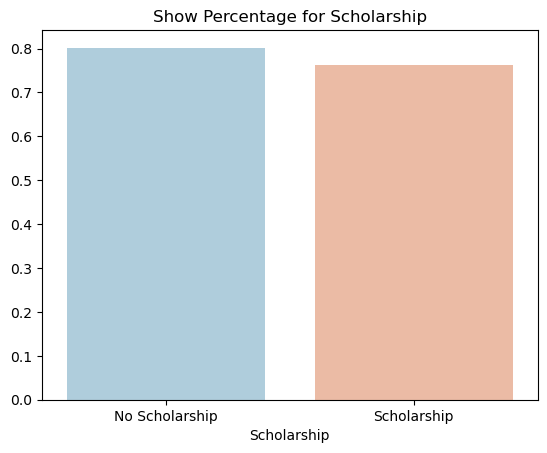

In [52]:
df_s_ratio = df[df.NoShow == 'No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the above visualization we can see that there are around 100,000 patients without Scholarship and out of them around 80% have come for the visit.
- Out of the 10,500 patients with Scholarship around 75% of them have come for the visit.

So, Scholarship feature could help us in determining if a patient will turn up for the visit after an appointment.

#### 5.5 Hypertension

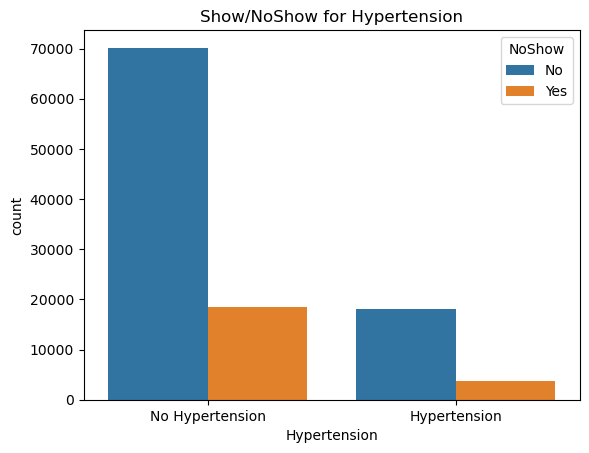

In [53]:
ax = sns.countplot(x=df.Hypertension, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

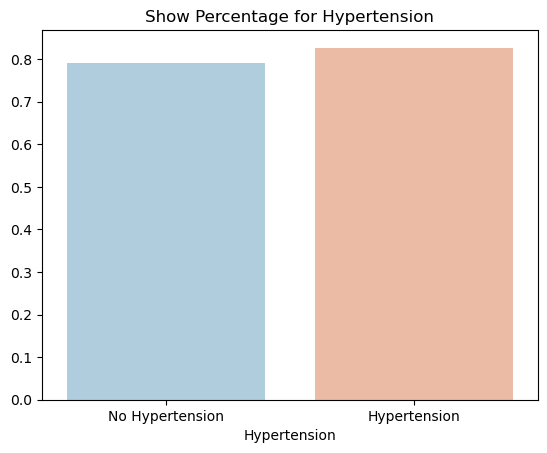

In [54]:
df_h_ratio = df[df.NoShow == 'No'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()
ax = sns.barplot(x=df_h_ratio.index, y=df_h_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the above visualization we can see that there are around 88,000 patients without Hypertension and out of them around 78% have come for the visit.
- Out of the 22,500 patients with Hypertension around 85% of them have come for the visit.

So, Hypertension feature could help us in determining if a patient will turn up for the visit after an appointment.

#### 5.6 Diabetes

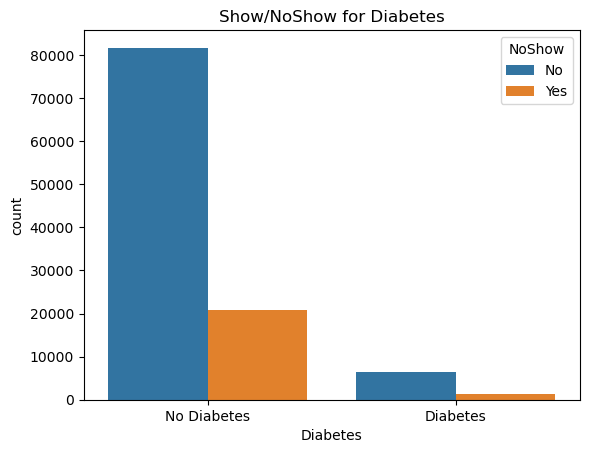

In [55]:
ax = sns.countplot(x=df.Diabetes, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

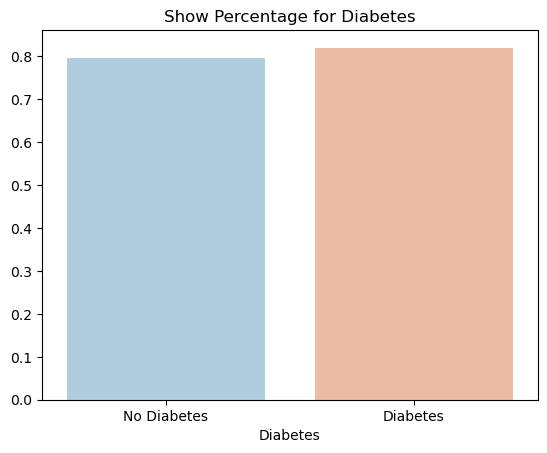

In [56]:
df_d_ratio = df[df.NoShow == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
ax = sns.barplot(x=df_d_ratio.index, y=df_d_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the above visualization we can see that there are around 102,000 patients without Diabetes and out of them around 80% have come for the visit.
- Out of the 8,500 patients with Diabetes around 83% of them have come for the visit.

So, Diabetes feature could help us in determining if a patient will turn up for the visit after an appointment.

#### 5.7 Alcoholism

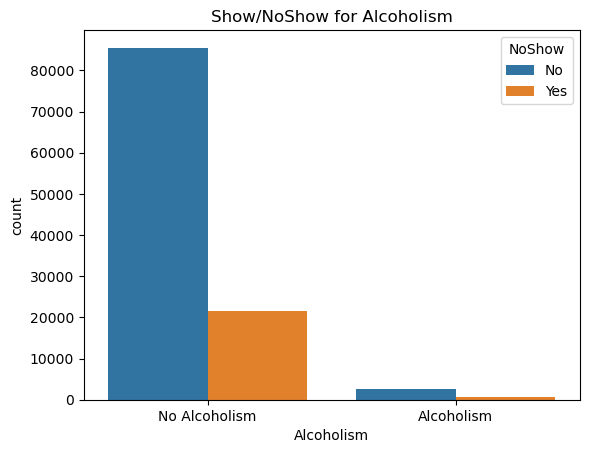

In [57]:
ax = sns.countplot(x=df.Alcoholism, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

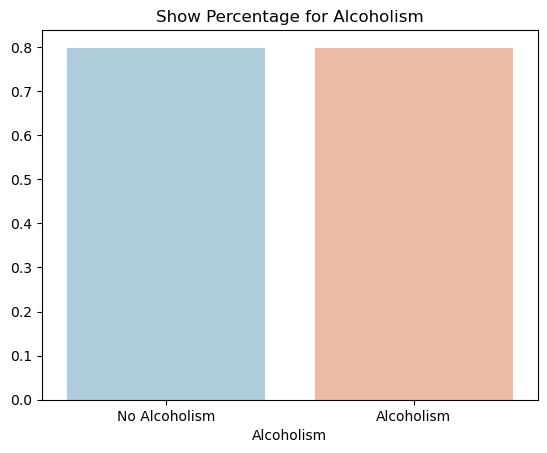

In [58]:
df_a_ratio = df[df.NoShow == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()
ax = sns.barplot(x=df_a_ratio.index, y=df_a_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the above visualization we can see that there are around 105,000 patients without Alcoholism and out of them around 80% have come for the visit.
- Out of the 5,500 patients with Alcoholism around 80% of them have come for the visit.

As the percentage of visits for patients with and without Alcoholism is the same it may not help us in determining if a patient will come for a visit.

#### 5.8 Handicap

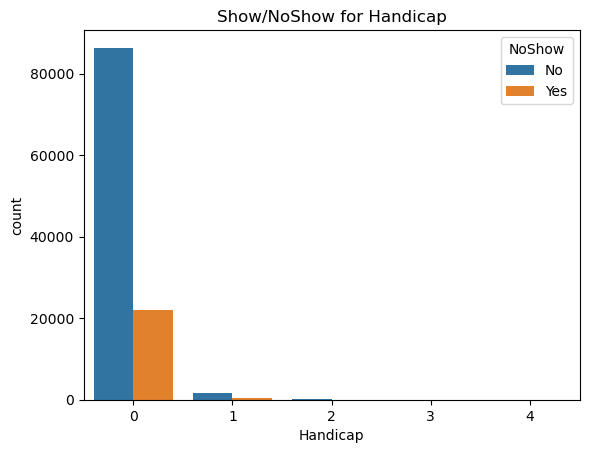

In [59]:
ax = sns.countplot(x=df.Handicap, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Handicap")
plt.show()

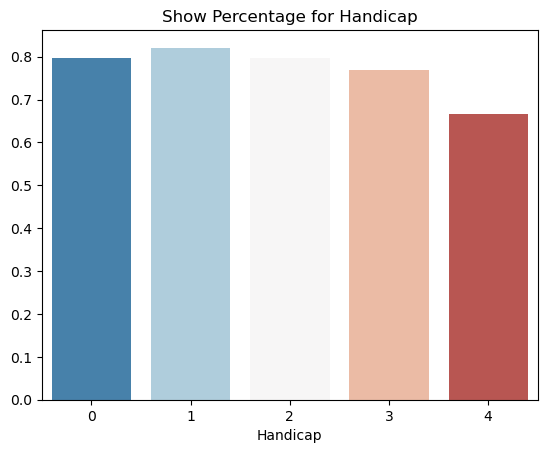

In [60]:
df_ha_ratio = df[df.NoShow == 'No'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
ax = sns.barplot(x=df_ha_ratio.index, y=df_ha_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Handicap")
plt.show()

- From the above visualization we can see that there are around 110,000 patients without Handicap and out of them around 80% have come for the visit.

As we can see a clear distinction between different Handicap levels this feature will help us in determining if a patient will turn up for the visit after taking an appointment.

#### 5.9 SMSReceived

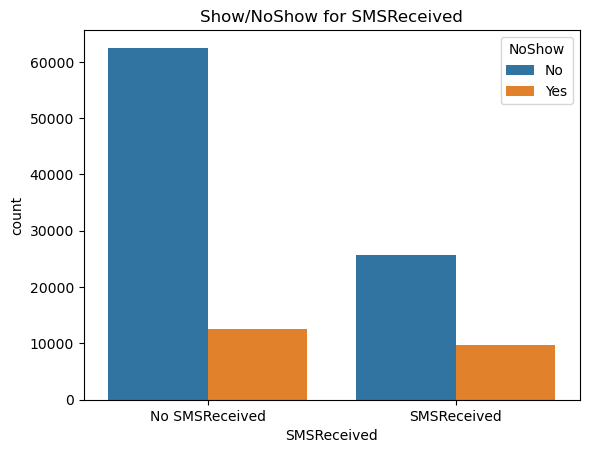

In [61]:
ax = sns.countplot(x=df.SMSReceived, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

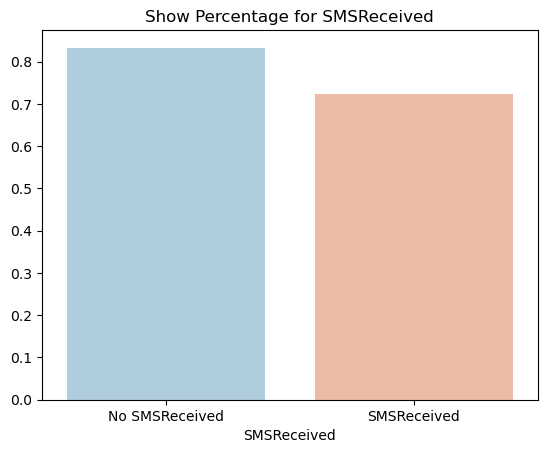

In [62]:
df_s_ratio = df[df.NoShow == 'No'].groupby(['SMSReceived']).size()/df.groupby(['SMSReceived']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the above visualization we can see that there are around 75,000 patients who have not received SMS and out of them around 84% have come for the visit.
- Out of the 35,500 patients who have received SMS around 72% of them have come for the visit. (This looks opposite to what usually happens. People who do receive a reminder SMS usually tend to visit the hospital more than those who haven't received an SMS. Or this could be an SMS that was recived while booking an appointment and could possibly have no correlation with the visit probability.)

As we can see a clear distinction between people reveiving SMS and not receiving SMS this feature will help us in determining if a patient will turn up for the visit after taking an appointment.

#### 5.10 ScheduledDay_DOW

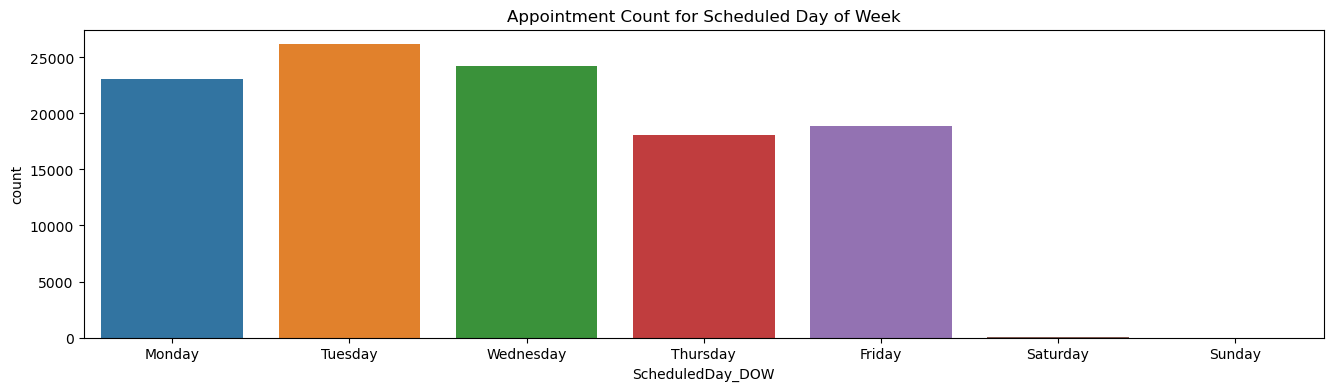

In [63]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.ScheduledDay_DOW, order=week_key)
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show()

- Looks like the call center that takes the appointments doesn't work over the weekends as we do not see any appointments taken on `Saturday` and `Sunday'.

#### 5.11 AppointmentDay_DOW

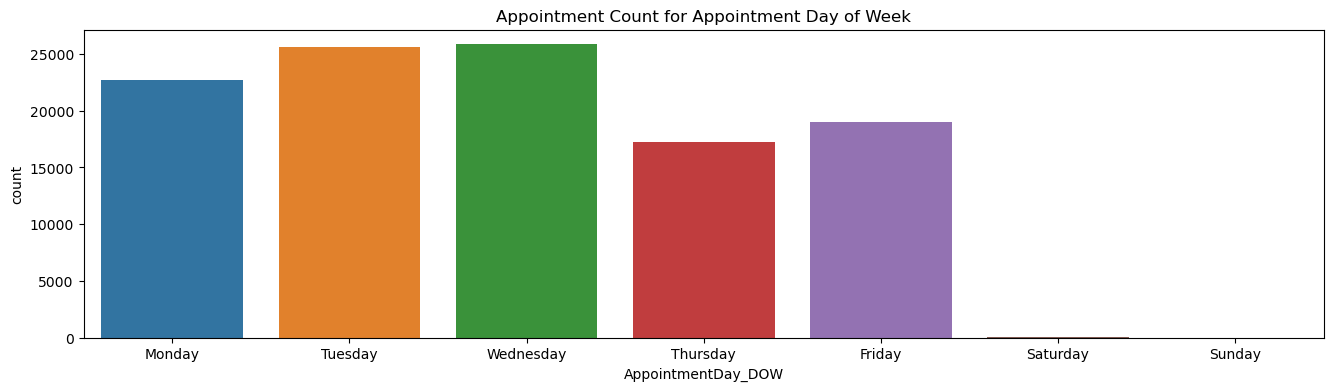

In [64]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDay_DOW, order=week_key)
ax.set_title("Appointment Count for Appointment Day of Week")
plt.show()

- There looks like a pattern with the appointments from the above visualizations. Also, we can see there are very less appointments on `Saturday` and no appointments on `Sunday`.

So, AppointmentDay_DOW could help in determining if a patient visits the hospital after taking an appointment.

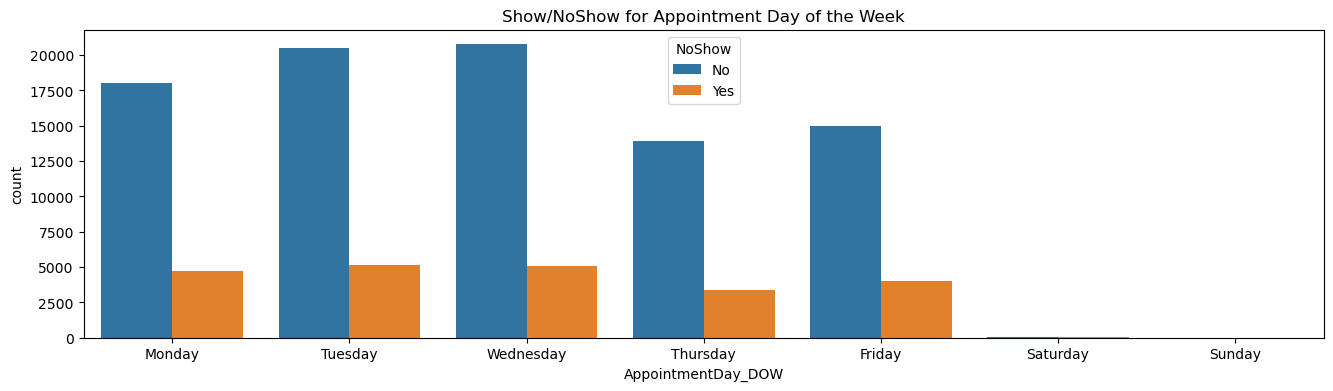

In [65]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDay_DOW, hue=df.NoShow, order=week_key)
ax.set_title("Show/NoShow for Appointment Day of the Week")
plt.show()

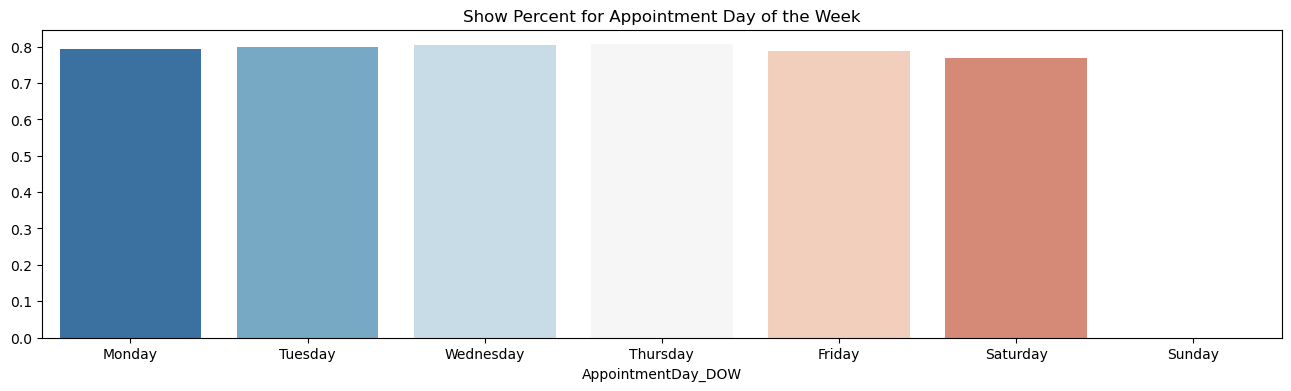

In [66]:
df_a_dow_ratio = df[df.NoShow == 'No'].groupby(['AppointmentDay_DOW']).size()/df.groupby(['AppointmentDay_DOW']).size()
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_a_dow_ratio.index, y=df_a_dow_ratio, order=week_key, palette="RdBu_r")
ax.set_title("Show Percent for Appointment Day of the Week")
plt.show()

- As we predicted earlier, we do not see a clear pattern in the patients visits based on the week day. But we can observe that on Saturday's the percentage of visits is less. So, AppointmentDay_DOW can help us in predicting the visits by a small number.

#### 5.12 Waiting_Time

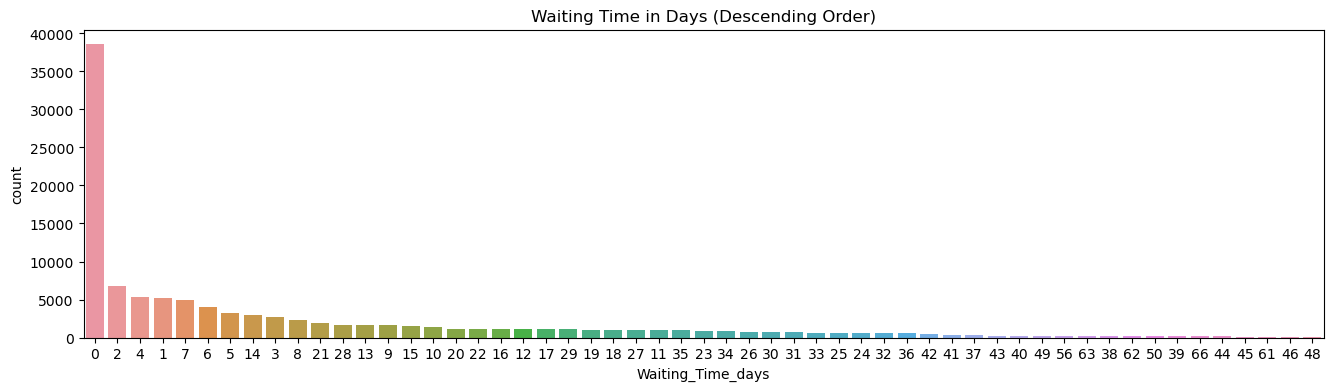

In [67]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts().iloc[:55].index)
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()

- From the above visualization we can see that most of the patients are booking their appointments on the same day. The next highest waiting times are 2days, 4 days and 1 day.

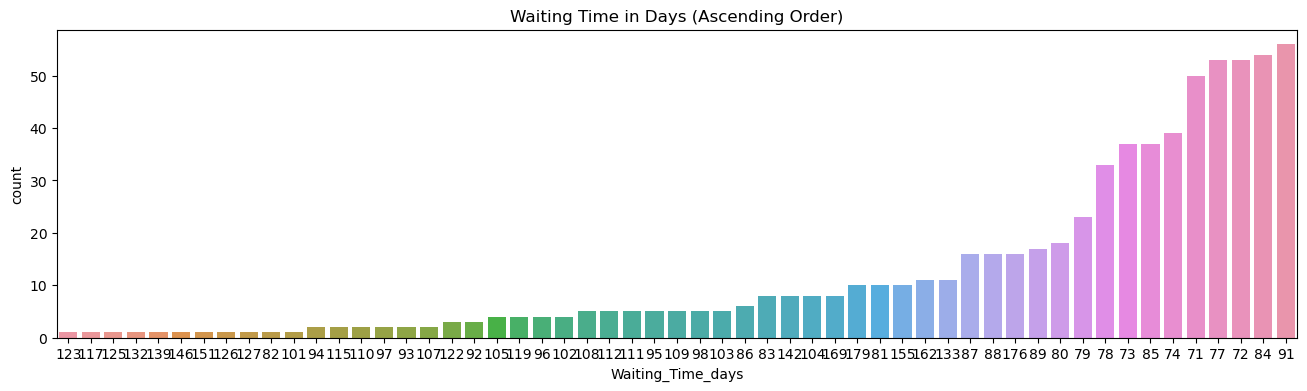

In [68]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts(ascending=True).iloc[:55].index)
ax.set_title("Waiting Time in Days (Ascending Order)")
plt.show()

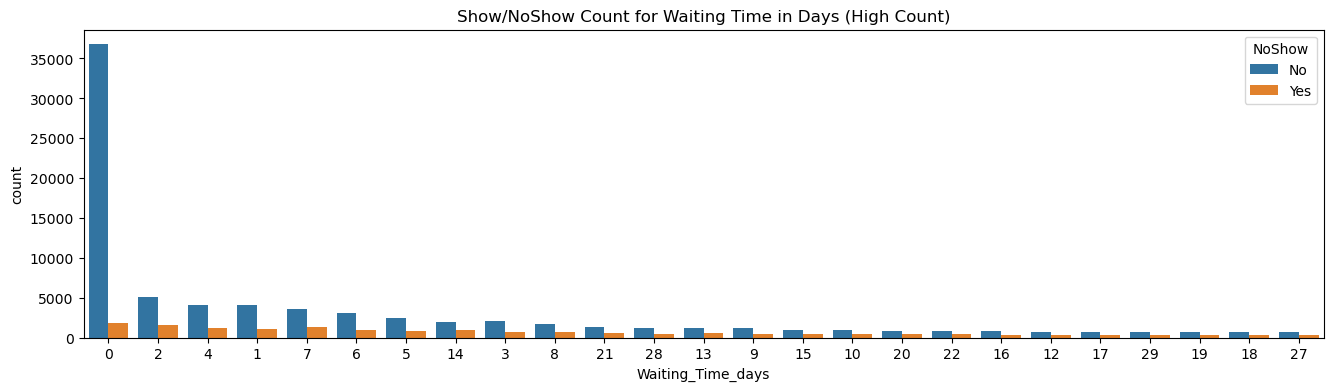

In [69]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, hue=df.NoShow, order=df.Waiting_Time_days.value_counts().iloc[:25].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days (High Count)")
plt.show()

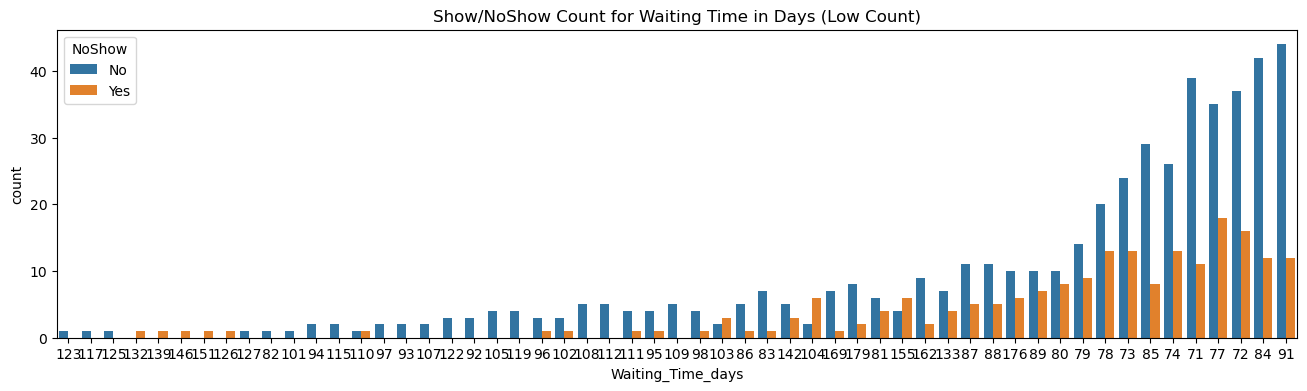

In [70]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, hue=df.NoShow, order=df.Waiting_Time_days.value_counts(ascending=True).iloc[:55].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days (Low Count)")
plt.show()

- Below we will visualize the last few rows (High WaitTime) for the Waiting_Time_days column.

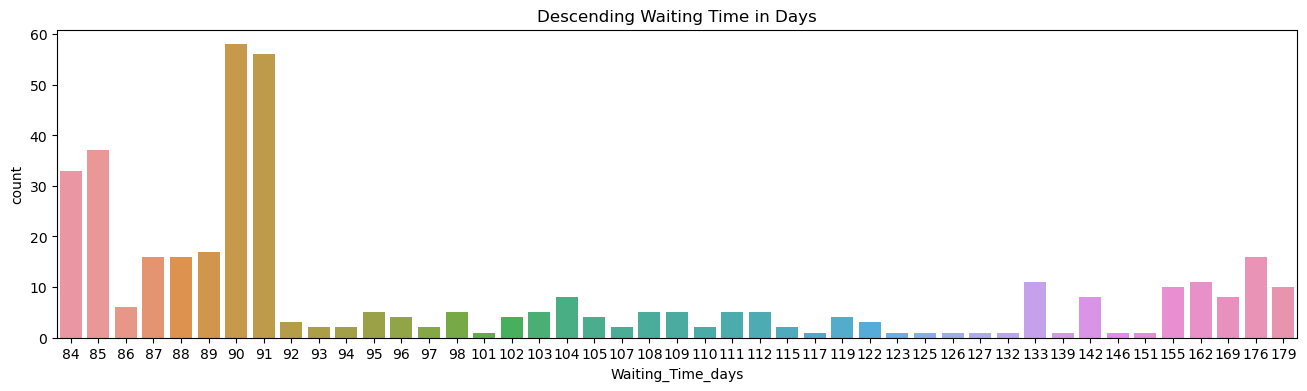

In [71]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df[['Waiting_Time_days']].sort_values('Waiting_Time_days', ascending=False).Waiting_Time_days.iloc[:400])
ax.set_title("Descending Waiting Time in Days")
plt.show()

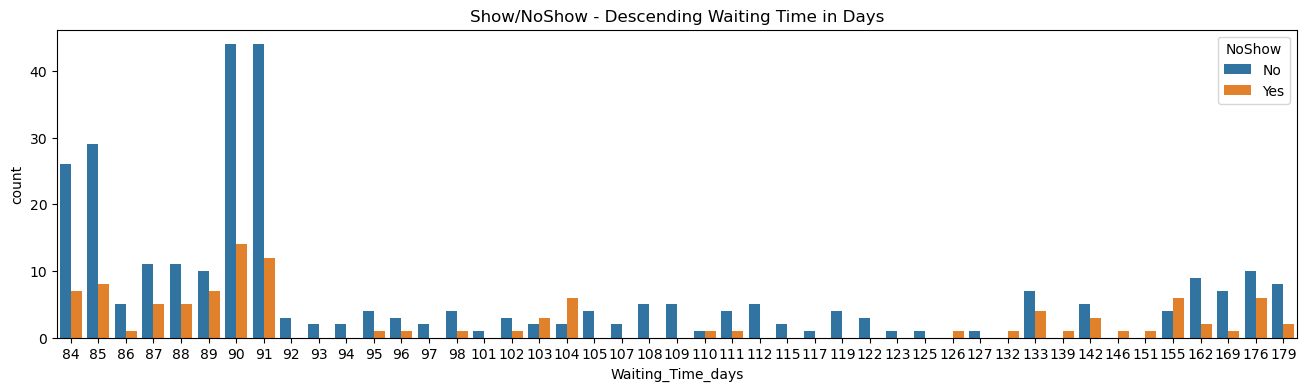

In [72]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df[['Waiting_Time_days']].sort_values('Waiting_Time_days', ascending=False).Waiting_Time_days.iloc[:400], hue=df.NoShow)
ax.set_title("Show/NoShow - Descending Waiting Time in Days")
plt.show()

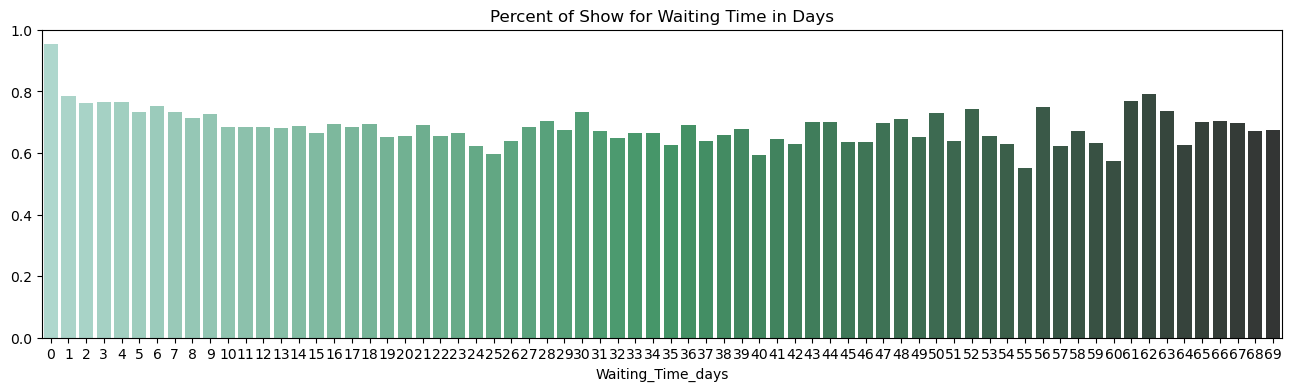

In [73]:
df_w_ratio = df[df.NoShow == 'No'].groupby(['Waiting_Time_days']).size()/df.groupby(['Waiting_Time_days']).size()

plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio, order=df.Waiting_Time_days.iloc[:70].index, palette="BuGn_d")
ax.set_title("Percent of Show for Waiting Time in Days")
plt.show()

From the above visualization we can see that around 95% of the patients who have booked their appointments on the same day and visiting the hospital without fail. Also close to 80% of the patients are visiting the hospital if they had booked their appointments just before 4 days.

As we have a clear distinction for the patients Show/NoShow with the Waiting_Time_days feature this indeed should help us with a better prediction.

### 6. Model Building

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Gender              110526 non-null  object        
 1   ScheduledDay        110526 non-null  datetime64[ns]
 2   AppointmentDay      110526 non-null  datetime64[ns]
 3   Age                 110526 non-null  int64         
 4   Neighbourhood       110526 non-null  object        
 5   Scholarship         110526 non-null  int64         
 6   Hypertension        110526 non-null  int64         
 7   Diabetes            110526 non-null  int64         
 8   Alcoholism          110526 non-null  int64         
 9   Handicap            110526 non-null  int64         
 10  SMSReceived         110526 non-null  int64         
 11  NoShow              110526 non-null  object        
 12  ScheduledDay_DOW    110526 non-null  object        
 13  AppointmentDay_DOW  110526 non-nul

In [75]:
# Use `LabelEncoder` to encode labels with value between 0 and n_classes-1.
#Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
#Neighbourhood
le = LabelEncoder()
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])
#ScheduledDay_DOW
le = LabelEncoder()
df['ScheduledDay_DOW'] = le.fit_transform(df['ScheduledDay_DOW'])
#AppointmentDay_DOW
le = LabelEncoder()
df['AppointmentDay_DOW'] = le.fit_transform(df['AppointmentDay_DOW'])
print("LabelEncoder Completed")

#NoShow
le = LabelEncoder()
df['NoShow'] = le.fit_transform(df['NoShow'])

LabelEncoder Completed


In [76]:
df['ScheduledDay_Y'] = df['ScheduledDay'].dt.year
df['ScheduledDay_M'] = df['ScheduledDay'].dt.month
df['ScheduledDay_D'] = df['ScheduledDay'].dt.day
df.drop(['ScheduledDay'], axis=1, inplace=True)

df['AppointmentDay_Y'] = df['AppointmentDay'].dt.year
df['AppointmentDay_M'] = df['AppointmentDay'].dt.month
df['AppointmentDay_D'] = df['AppointmentDay'].dt.day
df.drop(['AppointmentDay'], axis=1, inplace=True)

In [77]:
df.sample(n=10)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
21380,0,64,27,0,0,0,0,0,0,0,3,1,4,2016,5,5,2016,5,9
77829,1,66,58,0,0,0,0,0,0,0,3,3,0,2016,5,12,2016,5,12
32792,1,63,57,0,0,0,1,0,1,0,4,4,28,2016,5,3,2016,5,31
37444,1,33,75,0,0,0,0,0,0,0,4,4,0,2016,5,31,2016,5,31
70760,1,89,24,0,1,1,0,0,1,1,0,4,11,2016,4,29,2016,5,10
19315,0,11,17,0,0,0,0,0,0,0,0,0,0,2016,5,20,2016,5,20
88934,0,4,54,0,0,0,0,0,1,0,0,0,21,2016,5,13,2016,6,3
46945,0,84,59,0,0,0,0,0,0,0,1,1,0,2016,5,16,2016,5,16
82185,1,8,66,0,0,0,0,0,0,1,1,4,22,2016,4,18,2016,5,10
60052,1,47,56,0,1,1,0,0,0,1,5,1,19,2016,4,20,2016,5,9


**From the basic EDA we see that there are around 80% of the patients who have turned up. We see a clear class imbalance problem here. A naive approach of predicting that every one shows up gives us an accuracy of 0.8. Below we shall see how well the classifiers score on this dataset.**

In [78]:
# Get the Dependent and Independent Features.
X = df.drop(['NoShow'], axis=1)
y = df['NoShow']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Process of changing the scale of data.
scaler = StandardScaler()
X_train_Scaler = scaler.fit_transform(X_train)
X_test_Scaler = scaler.transform(X_test)

In [87]:
#technique used in imbalanced classification problems to balance the class distribution by reducing the number of instances in the majority class(es).
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

df_balanced_under = pd.concat([pd.DataFrame(X_train, columns=X.columns), pd.Series(y_train, name='NoShow')], axis=1)

print(df_balanced_under['NoShow'].value_counts())

NoShow
0    15721
1    15721
Name: count, dtype: int64


#### 6.1 DecisionTreeClassifier

In [154]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [170]:
dt_clf.score(X_test, y_test)

0.7317018004161766

In [171]:
from sklearn.metrics import classification_report
y_pred = dt_clf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     17354
           1       0.37      0.34      0.35      4752

    accuracy                           0.73     22106
   macro avg       0.59      0.59      0.59     22106
weighted avg       0.72      0.73      0.73     22106



In [172]:
X_train.shape

(88420, 18)

#### 6.2 RandomForestClassifier

In [173]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [175]:
rf_clf.score(X_test, y_test)

0.7904188907988782

In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     17715
           1       0.34      0.37      0.35      4391

    accuracy                           0.73     22106
   macro avg       0.59      0.59      0.59     22106
weighted avg       0.74      0.73      0.74     22106



#### 6.3 GridSearchCV

In [177]:
params={'n_estimators':[10,20], 'max_depth':[None, 100], 'min_samples_split':[2,3]}
rf_clf = RandomForestClassifier(random_state=0)
clf_grid = GridSearchCV(rf_clf, params, cv=15, n_jobs=-1, verbose=1)
clf_grid.fit(X_train, y_train)
print(clf_grid.best_params_)
print(clf_grid.best_score_)

Fitting 15 folds for each of 8 candidates, totalling 120 fits
{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 20}
0.78291102091142


In [178]:
y_pred = clf_grid.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88     19974
           1       0.21      0.44      0.29      2132

    accuracy                           0.79     22106
   macro avg       0.57      0.64      0.58     22106
weighted avg       0.86      0.79      0.82     22106



6.4 KNN

In [147]:
### K-Nearest Neighbors (KNN):
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
 
# Initialize KNN Classifier
knn_clf = KNeighborsClassifier( metric='manhattan',
    n_neighbors=10,
    weights='distance',
    algorithm='ball_tree',
    leaf_size=10,
    p=1.5,
    n_jobs=4,)
 
# Train the model
knn_clf.fit(X_train, y_train)
 
# Predict on the test set
y_pred = knn_clf.predict(X_test)
 
# Evaluate the model
#print(classification_report(y_test,y_pred))
knn_clf.score(X_test, y_test)

0.7949425495340632

In [179]:
#Knn Gridsearch parameters its used for improve the model.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': [5, 10, 15, 20],
    'algorithm': ['ball_tree', 'kd_tree'],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}



knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, scoring='f1', cv=30, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 30 folds for each of 32 candidates, totalling 960 fits


GridSearchCV(cv=30, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [181]:
#Is givin the best parameter.
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_f1 = grid_search.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

y_pred=grid_search.predict(X_test)


The best model was: KNeighborsClassifier(algorithm='kd_tree', metric='manhattan',
                     weights='distance')
The best parameter values were: {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
The best f1-score was: 0.3331720189342819


In [182]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.7817334660273229
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     17715
           1       0.42      0.28      0.34      4391

    accuracy                           0.78     22106
   macro avg       0.63      0.59      0.60     22106
weighted avg       0.75      0.78      0.76     22106



In [93]:
# For install xgboost library.
!pip install xgboost                

In [126]:
#show the information
X_train.info()          

<class 'pandas.core.frame.DataFrame'>
Index: 88420 entries, 58187 to 15795
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Gender              88420 non-null  int32
 1   Age                 88420 non-null  int64
 2   Neighbourhood       88420 non-null  int32
 3   Scholarship         88420 non-null  int64
 4   Hypertension        88420 non-null  int64
 5   Diabetes            88420 non-null  int64
 6   Alcoholism          88420 non-null  int64
 7   Handicap            88420 non-null  int64
 8   SMSReceived         88420 non-null  int64
 9   ScheduledDay_DOW    88420 non-null  int32
 10  AppointmentDay_DOW  88420 non-null  int32
 11  Waiting_Time_days   88420 non-null  int64
 12  ScheduledDay_Y      88420 non-null  int32
 13  ScheduledDay_M      88420 non-null  int32
 14  ScheduledDay_D      88420 non-null  int32
 15  AppointmentDay_Y    88420 non-null  int32
 16  AppointmentDay_M    88420 non-null  int32

6.5 XGBoost

In [131]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8024065864471184
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     17715
           1       0.52      0.08      0.15      4391

    accuracy                           0.80     22106
   macro avg       0.66      0.53      0.52     22106
weighted avg       0.75      0.80      0.74     22106



6.6 SVM

In [109]:
### Support Vector Machines (SVM):
from sklearn.svm import SVC
from sklearn.metrics import classification_report
 
# Initialize SVM Classifier
svm_clf = SVC()
 
# Train the model
svm_clf.fit(X_train, y_train)
 
# Predict on the test set
y_pred = svm_clf.predict(X_test)
 
# Evaluate the model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84     26560
           1       0.34      0.32      0.33      6598

    accuracy                           0.74     33158
   macro avg       0.59      0.58      0.58     33158
weighted avg       0.74      0.74      0.74     33158



In [116]:
svm_clf.get_params

<bound method BaseEstimator.get_params of SVC()>

In [ ]:
#SVM Gridsearch parameters its used for improve the model.
parameters_dictionary = {'kernel':['linear', 'rbf'], 
                         'C':[0.0001, 1, 10], 
                         'gamma':[1, 10, 100]}
svc = SVC()

grid_search = GridSearchCV(svc, 
                           parameters_dictionary, 
                           scoring = 'f1',
                           return_train_score=True, 
                           cv = 2,
                           verbose = 1) # Displays how many combinations of parameters and folds we'll have, for more information as the time to run each search, use 2 or 3 values instead of 1)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


In [110]:
#Is givin the best parameter.
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_f1 = grid_search.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=20,
                     weights='distance')
The best parameter values were: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
The best f1-score was: 0.6738941614251595


6.7 Deap learing with Keras

In [140]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
model_H = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train_Scaler.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
   
    
    keras.layers.Dense(16, activation="relu"),
   
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [141]:
model_H.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [142]:
y_train.value_counts()

NoShow
0    70492
1    17928
Name: count, dtype: int64

In [143]:
callback_H = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,   
    verbose=1,
    restore_best_weights=True
)

In [144]:
history_H = model_H.fit(X_train_Scaler, y_train, epochs=50, batch_size=8, validation_split=0.2)#, callbacks=[callback_H])

Epoch 1/50
7737/7737 [==============================] - 20s 2ms/step - loss: 0.5081 - accuracy: 0.7974 - val_loss: 0.4994 - val_accuracy: 0.8017
Epoch 2/50
7737/7737 [==============================] - 19s 2ms/step - loss: 0.5043 - accuracy: 0.7976 - val_loss: 0.4983 - val_accuracy: 0.8017
Epoch 3/50
7737/7737 [==============================] - 19s 2ms/step - loss: 0.5041 - accuracy: 0.7976 - val_loss: 0.4987 - val_accuracy: 0.8017
Epoch 4/50
7737/7737 [==============================] - 20s 3ms/step - loss: 0.5041 - accuracy: 0.7976 - val_loss: 0.4990 - val_accuracy: 0.8017
Epoch 5/50
7737/7737 [==============================] - 20s 3ms/step - loss: 0.5041 - accuracy: 0.7976 - val_loss: 0.4983 - val_accuracy: 0.8017
Epoch 6/50
7737/7737 [==============================] - 19s 2ms/step - loss: 0.5037 - accuracy: 0.7976 - val_loss: 0.4998 - val_accuracy: 0.8017
Epoch 7/50
7737/7737 [==============================] - 21s 3ms/step - loss: 0.5037 - accuracy: 0.7976 - val_loss: 0.4986 - val_ac

KeyboardInterrupt: 

In [137]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test,y_Hpred_binary))

In [117]:
from imblearn.over_sampling import SMOTE

From the above Model Score we can see that we are doing almost similar to the naive predictor. Also, as we have imbalanced classes, we should ideally use different metric like `F1-Score` rather than `Accuracy`.

#### 7. LImitations

From the data we can see that the AppointmentDay spans just over a month which means that we were given only a snapshot of complete data. Though there are no null values in the data, making exact predictions and analysis on a snapshot data is difficult and the analysis might not make a representation of the whole data.

Another very important thing that was missing from the data is the Time details in the AppointmentDay which would really help us a lot in predicting NoShow of a patient. As we have the time detail for ScheduledDay, we should have saved the similar thing in AppointmentDay also and not just normalize it.

Also, a reason for the appointment and the consultation doctor specialization would have helped us a lot in making better analysis and predictions for the NoShow of a patient.

#### 8. Conclusion

From the above feature importance, we could see that `Gender`, `Age`, `Neighbourhood`, `Scholarship` and `Hypertension` are some of the top features that would help us determine if the patient who has taken an appointment will Show/NoShow.